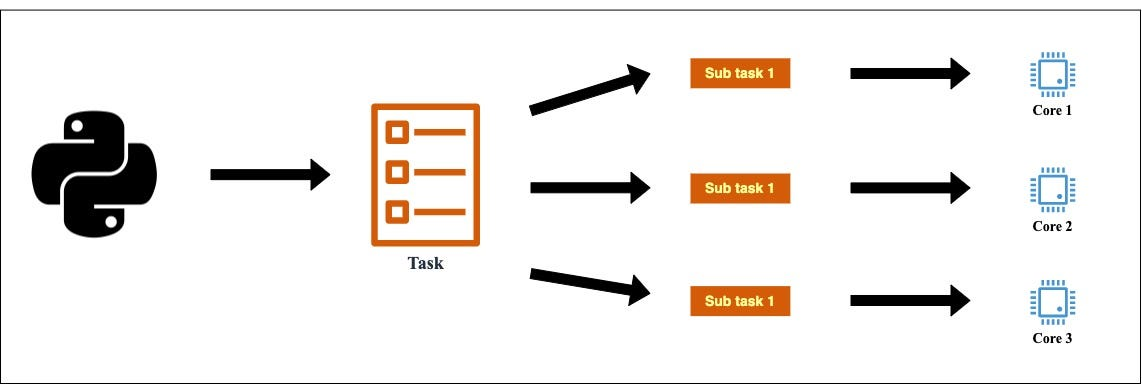

# multiprocessing module

The multiprocessing module enables true parallel execution in Python by creating separate OS-level processes, each with its own Python interpreter and memory space. This bypasses the Global Interpreter Lock (GIL) and is therefore ideal for CPU-bound workloads.


| Problem          | Threading | Multiprocessing |
| ---------------- | --------- | --------------- |
| GIL limitation   | ❌ Yes     | ✅ No            |
| CPU-bound tasks  | ❌ Poor    | ✅ Excellent     |
| I/O-bound tasks  | ✅ Good    | ⚠️ Overkill     |
| Memory isolation | ❌ Shared  | ✅ Isolated      |
| Fault isolation  | ❌ Weak    | ✅ Strong        |


### Task

In [12]:
def cpu_task(n: int) -> int:
    total = 0
    for i in range(n):
        total += i * i
    return total

### Single Threaded Execution

In [13]:
import time

start = time.perf_counter()
cpu_task(50_000_000)
end = time.perf_counter()

print(f"Single-thread time: {end - start:.2f}s")

Single-thread time: 5.36s


### Multi-Threading (4 Threads)

In [14]:
import threading
import time

threads = []
start = time.perf_counter()

for _ in range(4):
    t = threading.Thread(target=cpu_task, args=(12_500_000,))
    t.start()
    threads.append(t)

for t in threads:
    t.join()

end = time.perf_counter()
print(f"Threading time: {end - start:.2f}s")

Threading time: 5.10s


### Multiprocessing (4 Processes)

In [15]:
from multiprocessing import Process
import time

processes = []
start = time.perf_counter()

for _ in range(4):
    p = Process(target=cpu_task, args=(12_500_000,))
    p.start()
    processes.append(p)

for p in processes:
    p.join()

end = time.perf_counter()
print(f"Multiprocessing time: {end - start:.2f}s")

Multiprocessing time: 0.28s


Each process has:

* Its own interpreter
* Its own GIL
* Its own memory space